In [119]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [313]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv('train_s3TEQDk.csv')
test = pd.read_csv('test_mSzZ8RL.csv')

In [4]:
train.shape, test.shape

((245725, 11), (105312, 10))

In [5]:
train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


In [6]:
train.describe()

,Age,Vintage,Avg_Account_Balance,Is_Lead
count,245725.000000,245725.000000,2.457250e+05,245725.000000
mean,43.856307,46.959141,1.128403e+06,0.237208
std,14.828672,32.353136,8.529364e+05,0.425372
min,23.000000,7.000000,2.079000e+04,0.000000
25%,30.000000,20.000000,6.043100e+05,0.000000
50%,43.000000,32.000000,8.946010e+05,0.000000
75%,54.000000,73.000000,1.366666e+06,0.000000
max,85.000000,135.000000,1.035201e+07,1.000000


In [28]:
test.describe()

,Age,Vintage,Avg_Account_Balance
count,105312.000000,105312.000000,1.053120e+05
mean,43.871002,46.842819,1.134195e+06
std,14.872890,32.273634,8.662430e+05
min,24.000000,7.000000,2.259700e+04
25%,30.000000,20.000000,6.039822e+05
50%,43.000000,32.000000,8.966345e+05
75%,54.000000,73.000000,1.371598e+06
max,85.000000,135.000000,9.908858e+06


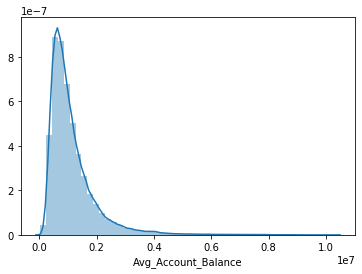

In [7]:
sns.distplot(train['Avg_Account_Balance'])

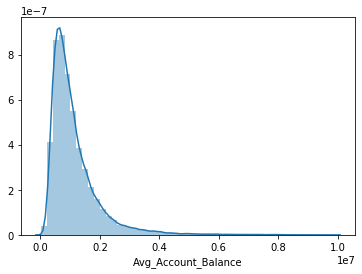

In [29]:
sns.distplot(test['Avg_Account_Balance'])

In [20]:
train['Channel_Code'].value_counts()/train.shape[0]

X1    0.422090
X3    0.279630
X2    0.275617
X4    0.022664
Name: Channel_Code, dtype: float64

In [30]:
test['Channel_Code'].value_counts()/test.shape[0]

X1    0.422402
X3    0.277927
X2    0.277043
X4    0.022628
Name: Channel_Code, dtype: float64

In [9]:
train['Gender'].value_counts()

Male      134197
Female    111528
Name: Gender, dtype: int64

In [32]:
test['Gender'].value_counts()/test.shape[0]

Male      0.547943
Female    0.452057
Name: Gender, dtype: float64

In [19]:
134197/(134197+111528)

0.5461267677281514

In [25]:
train['Occupation'].value_counts()/train.shape[0]

Self_Employed    0.410565
Salaried         0.293006
Other            0.285575
Entrepreneur     0.010854
Name: Occupation, dtype: float64

In [33]:
test['Occupation'].value_counts()/test.shape[0]

Self_Employed    0.410134
Salaried         0.293537
Other            0.286112
Entrepreneur     0.010217
Name: Occupation, dtype: float64

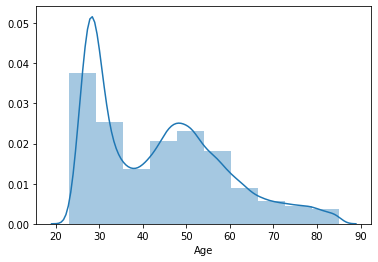

In [22]:
sns.distplot(train['Age'], bins=10)

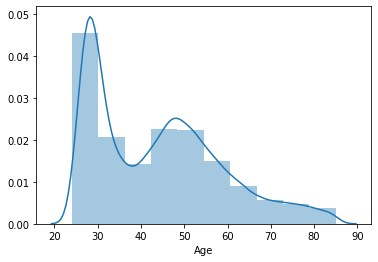

In [34]:
sns.distplot(test['Age'], bins=10)

In [12]:
train.Age.value_counts().sort_values()

23        1
85      604
84      624
83      694
82      749
      ...  
26     9039
30    11066
27    13005
29    13284
28    14533
Name: Age, Length: 63, dtype: int64

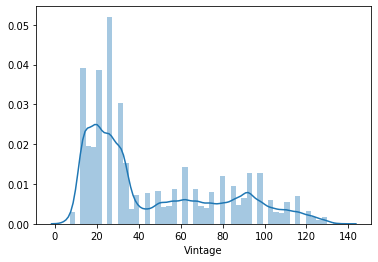

In [13]:
sns.distplot(train['Vintage'])

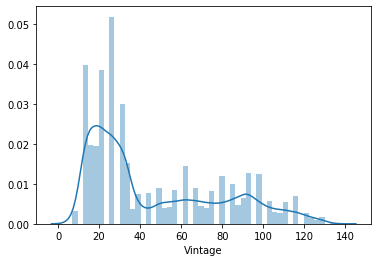

In [35]:
sns.distplot(test['Vintage'])

In [26]:
train['Credit_Product'].value_counts()/train.shape[0]

No     0.587474
Yes    0.293185
Name: Credit_Product, dtype: float64

In [36]:
test['Credit_Product'].value_counts()/test.shape[0]

No     0.585005
Yes    0.296092
Name: Credit_Product, dtype: float64

In [27]:
train['Is_Active'].value_counts()/train.shape[0]

No     0.611619
Yes    0.388381
Name: Is_Active, dtype: float64

In [37]:
test['Is_Active'].value_counts()/test.shape[0]

No     0.60579
Yes    0.39421
Name: Is_Active, dtype: float64

In [16]:
train['Is_Lead'].value_counts()

0    187437
1     58288
Name: Is_Lead, dtype: int64

In [17]:
train.Is_Lead.mean()

0.23720826126767727

In [18]:
58288/(58288+187437)

0.23720826126767727

In [24]:
train.Region_Code.nunique()

35

In [38]:
train['Avg_Account_Balance'].skew()

2.968726515557337

In [39]:
train['Age'].skew()

0.6189922275209511

In [40]:
train['Vintage'].skew()

0.7901885721179357

In [304]:
train.columns

Index(['ID', 'Gender', 'Age', 'Region_Code', 'Occupation', 'Channel_Code',
       'Vintage', 'Credit_Product', 'Avg_Account_Balance', 'Is_Active',
       'Is_Lead'],
      dtype='object')

In [314]:
train_dum = pd.concat([train, pd.get_dummies(train[['Gender','Occupation','Channel_Code','Credit_Product','Is_Active','Is_Lead']])])


In [315]:
train.groupby('Is_Lead').agg(['count','mean']).iloc[:,:]

Age            Vintage            Avg_Account_Balance  \
          count       mean   count       mean               count   
Is_Lead                                                             
0        187437  41.947662  187437  41.913923              187437   
1         58288  49.993944   58288  63.183074               58288   

                       
                 mean  
Is_Lead                
0        1.103018e+06  
1        1.210034e+06

In [316]:
train.groupby('Channel_Code').mean()

,Age,Vintage,Avg_Account_Balance,Is_Lead
Channel_Code,,,,
X1,32.324707,25.311576,1.030418e+06,0.091421
X2,50.422880,54.560804,1.142457e+06,0.327895
X3,54.717429,74.939443,1.274756e+06,0.367025
X4,44.757228,12.451966,9.766356e+05,0.247800


In [317]:
train.groupby('Gender').mean()

,Age,Vintage,Avg_Account_Balance,Is_Lead
Gender,,,,
Female,41.382639,41.764257,1.107373e+06,0.203581
Male,45.912114,51.276489,1.145881e+06,0.265155


In [318]:
train.groupby('Occupation').mean()

,Age,Vintage,Avg_Account_Balance,Is_Lead
Occupation,,,,
Entrepreneur,47.833521,69.664792,1.415043e+06,0.660667
Other,53.116797,54.924729,1.209870e+06,0.244952
Salaried,30.882901,26.348838,1.033420e+06,0.159669
Self_Employed,46.568563,55.527189,1.131946e+06,0.275965


In [320]:
train.groupby('Credit_Product').mean()

,Age,Vintage,Avg_Account_Balance,Is_Lead
Credit_Product,,,,
No,40.791600,40.567641,1.078018e+06,0.073588
Yes,46.846328,51.735269,1.189363e+06,0.314951


In [321]:
train.groupby('Is_Active').mean()

,Age,Vintage,Avg_Account_Balance,Is_Lead
Is_Active,,,,
No,41.271209,41.561674,1.076315e+06,0.208151
Yes,47.927291,55.459014,1.210431e+06,0.282967


In [41]:
train['Channel_Code'].value_counts().idxmax()

'X1'

In [44]:
train.Age.quantile(0.5)

43.0

In [45]:
from sklearn.ensemble import IsolationForest

In [46]:
clf = IsolationForest(contamination=0.02, )

In [60]:
train['Avg_Account_Balance'].values

array([1045696,  581988, 1484315, ...,  670659,  407504, 1129276],
      dtype=int64)

In [62]:
outliers = clf.fit_predict(train[['Age','Avg_Account_Balance']])

C:\Users\Sajal\Anaconda3\lib\site-packages\sklearn\ensemble\iforest.py:247: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)


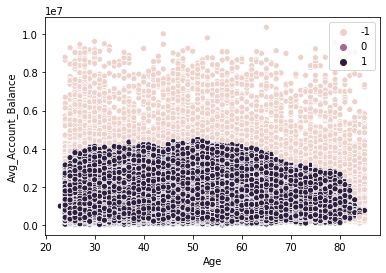

In [63]:
sns.scatterplot(train.Age, train.Avg_Account_Balance, outliers)

In [65]:
ol=0
for item in outliers:
    if item == -1:
        ol += 1
ol

4915

In [66]:
4915/len(outliers)

0.020002034794994406

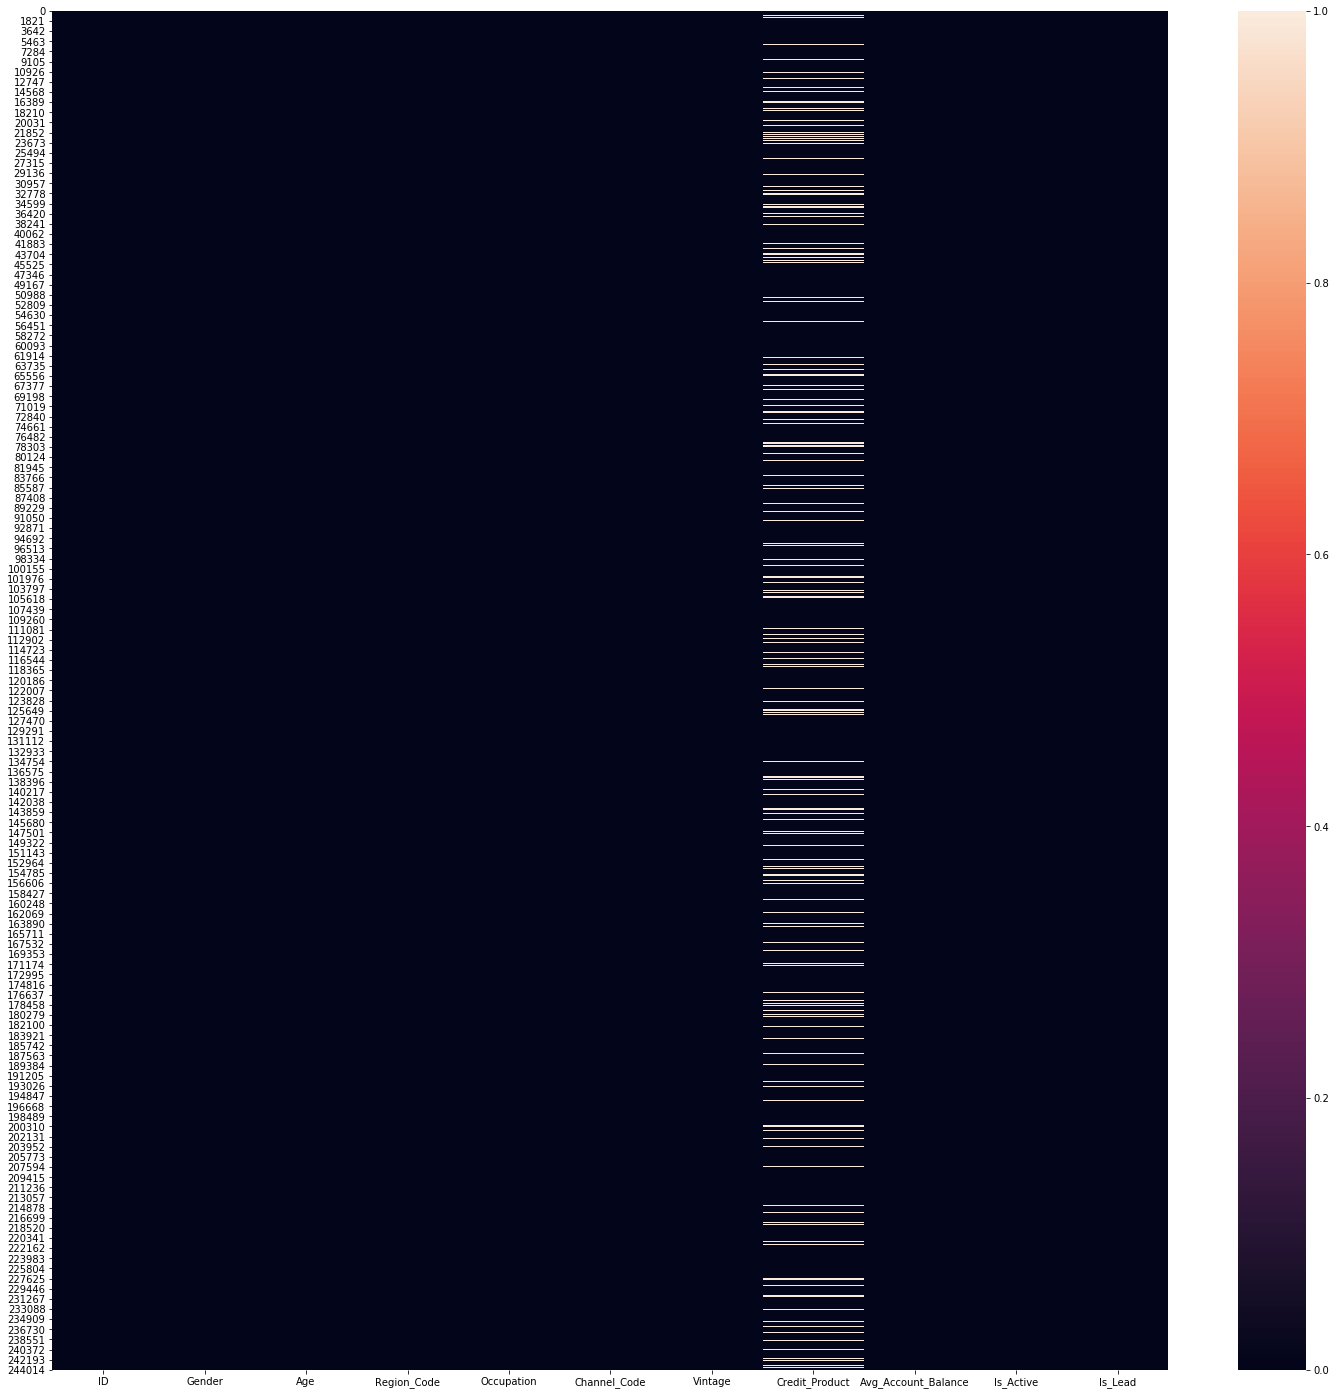

In [67]:
plt.figure(figsize=(25,25))
sns.heatmap(train.isna())

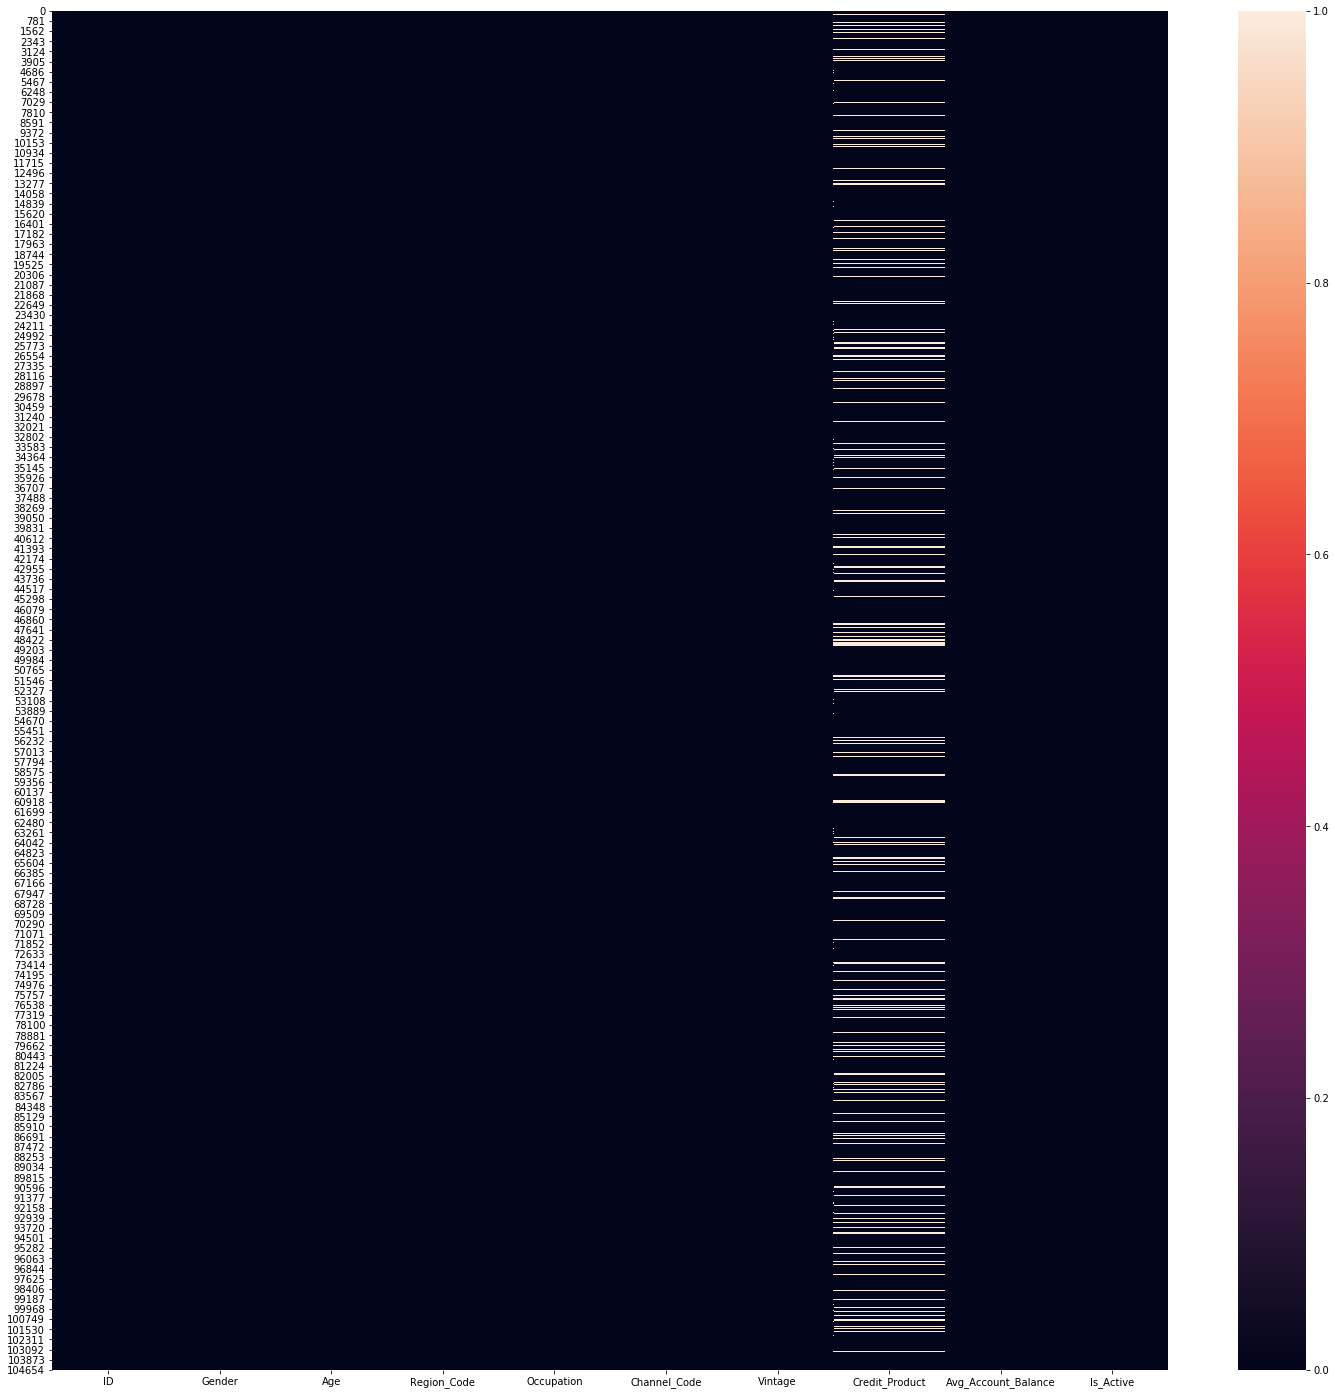

In [68]:
plt.figure(figsize=(25,25))
sns.heatmap(test.isna())

In [70]:
train.isna().sum()/train.shape[0]

ID                     0.000000
Gender                 0.000000
Age                    0.000000
Region_Code            0.000000
Occupation             0.000000
Channel_Code           0.000000
Vintage                0.000000
Credit_Product         0.119341
Avg_Account_Balance    0.000000
Is_Active              0.000000
Is_Lead                0.000000
dtype: float64

In [71]:
test.isna().sum()/test.shape[0]

ID                     0.000000
Gender                 0.000000
Age                    0.000000
Region_Code            0.000000
Occupation             0.000000
Channel_Code           0.000000
Vintage                0.000000
Credit_Product         0.118904
Avg_Account_Balance    0.000000
Is_Active              0.000000
dtype: float64

In [76]:
train.index[7
           ]

7

## Filling Missing Data

In [72]:
from sklearn.linear_model import LogisticRegression, LassoCV, SGDClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import f1_score, confusion_matrix, classification_report, accuracy_score
from sklearn.decomposition import PCA
from xgboost import XGBClassifier, XGBRFClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [136]:
fill_train = pd.read_csv('train_s3TEQDk.csv')
fill_test = pd.read_csv('test_mSzZ8RL.csv')



full = pd.concat([fill_train.drop('Is_Lead', axis=1), fill_test], axis=0)
full['Index'] = full.index
# for i in range(full.shape[0]):
#     full.loc[i, 'Index'] += i
    
x = full.dropna(axis=0)
X = full[full.Credit_Product.isna()]
y = x['Credit_Product']
Y = X['Credit_Product']


In [83]:
# x = training data

# X = testing data

# y = training Labels

# Y = labels to be predicted

In [137]:
full.shape, x.shape, X.shape, y.shape, Y.shape

((351037, 11), (309190, 11), (41847, 11), (309190,), (41847,))

### Data prep for predicting Credit_product

# Approach 1
## Dummies

In [89]:
full.dtypes

ID                     object
Gender                 object
Age                     int64
Region_Code            object
Occupation             object
Channel_Code           object
Vintage                 int64
Credit_Product         object
Avg_Account_Balance     int64
Is_Active              object
Index                   int64
dtype: object

In [90]:
data_dict = {'Female':0, 'Male':1, 'No':0,'Yes':1}

In [138]:
pd.get_dummies(full[['Gender','Channel_Code','Region_Code', 'Is_Active']])

,Gender_Female,Gender_Male,Channel_Code_X1,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Region_Code_RG250,Region_Code_RG251,Region_Code_RG252,Region_Code_RG253,...,Region_Code_RG277,Region_Code_RG278,Region_Code_RG279,Region_Code_RG280,Region_Code_RG281,Region_Code_RG282,Region_Code_RG283,Region_Code_RG284,Is_Active_No,Is_Active_Yes
0,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,1,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
2,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105307,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
105308,0,1,0,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
105309,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
105310,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [139]:
full.drop('ID', axis=1, inplace=True)
full = pd.concat([full, pd.get_dummies(full[['Occupation','Gender','Channel_Code','Region_Code', 'Is_Active']])], axis=1)
full.drop(['Gender','Channel_Code','Region_Code', 'Is_Active','Occupation'], axis=1, inplace=True)


In [140]:
full.head()

,Age,Vintage,Credit_Product,Avg_Account_Balance,Index,Occupation_Entrepreneur,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Gender_Female,...,Region_Code_RG277,Region_Code_RG278,Region_Code_RG279,Region_Code_RG280,Region_Code_RG281,Region_Code_RG282,Region_Code_RG283,Region_Code_RG284,Is_Active_No,Is_Active_Yes
0,73,43,No,1045696,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,30,32,No,581988,1,0,0,1,0,1,...,1,0,0,0,0,0,0,0,1,0
2,56,26,No,1484315,2,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,1
3,34,19,No,470454,3,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4,30,33,No,886787,4,0,0,1,0,1,...,0,0,0,0,0,1,0,0,1,0


In [141]:
x = full.dropna(axis=0)
X = full[full.Credit_Product.isna()]
y = x['Credit_Product']
Y = X['Credit_Product']

In [142]:
x.drop('Credit_Product', axis=1, inplace=True)
X.drop('Credit_Product', axis=1, inplace=True)

In [143]:
x

,Age,Vintage,Avg_Account_Balance,Index,Occupation_Entrepreneur,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Gender_Female,Gender_Male,...,Region_Code_RG277,Region_Code_RG278,Region_Code_RG279,Region_Code_RG280,Region_Code_RG281,Region_Code_RG282,Region_Code_RG283,Region_Code_RG284,Is_Active_No,Is_Active_Yes
0,73,43,1045696,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,30,32,581988,1,0,0,1,0,1,0,...,1,0,0,0,0,0,0,0,1,0
2,56,26,1484315,2,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
3,34,19,470454,3,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,30,33,886787,4,0,0,1,0,1,0,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105307,52,86,4242558,105307,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,1
105308,55,86,1159153,105308,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
105309,35,15,1703727,105309,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
105310,53,93,737178,105310,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


In [144]:
y

0          No
1          No
2          No
3          No
4          No
         ... 
105307    Yes
105308    Yes
105309     No
105310     No
105311     No
Name: Credit_Product, Length: 309190, dtype: object

In [145]:
x_train, x_test, y_train, y_test = train_test_split(x.drop('Index', axis=1), y, test_size=0.13, shuffle=True)

In [146]:
data = [x_train, y_train, x_test, y_test]

def run_model(model, data):
    model.fit(data[0], data[1])
    pred = model.predict(data[2])
    score = classification_report(data[3], pred, )
    acc = accuracy_score(data[3], pred)
    return [score, acc]

In [147]:
lr = LogisticRegression()
sgdc = SGDClassifier()
ada = AdaBoostClassifier()
bag = BaggingClassifier()
etc = ExtraTreeClassifier()
gbc = GradientBoostingClassifier()
rfc = RandomForestClassifier()
gnb = GaussianNB()
bnb = BernoulliNB()
knn = KNeighborsClassifier()
mlpc = MLPClassifier()
xgb = XGBClassifier()
xgbr = XGBRFClassifier()
lgb = LGBMClassifier()
cat = CatBoostClassifier()

models = [lr, ada, bag, etc, gbc, rfc, 
           gnb, bnb, knn, xgb, xgbr, lgb, cat]


In [148]:
model_names = []
model_performances = []

for model in models:
    perf = run_model(model, data)
    model_performances.append(perf)
    model_names.append(str(model.get_params).split('(')[0].split()[-1])
    print(model_names[-1], model_performances[-1][1], '\n', model_performances[-1][0],'\n\n------------------------------------------------------------------\n\n')
    

LogisticRegression 0.6644856325413608 
               precision    recall  f1-score   support

          No       0.66      1.00      0.80     26709
         Yes       0.00      0.00      0.00     13486

    accuracy                           0.66     40195
   macro avg       0.33      0.50      0.40     40195
weighted avg       0.44      0.66      0.53     40195
 

------------------------------------------------------------------


AdaBoostClassifier 0.7158353028983705 
               precision    recall  f1-score   support

          No       0.74      0.88      0.81     26709
         Yes       0.63      0.38      0.47     13486

    accuracy                           0.72     40195
   macro avg       0.68      0.63      0.64     40195
weighted avg       0.70      0.72      0.69     40195
 

------------------------------------------------------------------


BaggingClassifier 0.6929220052245304 
               precision    recall  f1-score   support

          No       0.73      0

46:	learn: 0.5416579	total: 2.3s	remaining: 46.6s
47:	learn: 0.5413641	total: 2.35s	remaining: 46.6s
48:	learn: 0.5412539	total: 2.39s	remaining: 46.5s
49:	learn: 0.5411081	total: 2.44s	remaining: 46.4s
50:	learn: 0.5409023	total: 2.49s	remaining: 46.4s
51:	learn: 0.5407500	total: 2.54s	remaining: 46.3s
52:	learn: 0.5405033	total: 2.59s	remaining: 46.3s
53:	learn: 0.5403025	total: 2.63s	remaining: 46.1s
54:	learn: 0.5401715	total: 2.68s	remaining: 46s
55:	learn: 0.5400254	total: 2.73s	remaining: 46s
56:	learn: 0.5398479	total: 2.77s	remaining: 45.9s
57:	learn: 0.5396641	total: 2.81s	remaining: 45.7s
58:	learn: 0.5395388	total: 2.86s	remaining: 45.7s
59:	learn: 0.5394314	total: 2.9s	remaining: 45.5s
60:	learn: 0.5392895	total: 2.96s	remaining: 45.5s
61:	learn: 0.5391162	total: 3s	remaining: 45.5s
62:	learn: 0.5390052	total: 3.05s	remaining: 45.3s
63:	learn: 0.5388503	total: 3.1s	remaining: 45.3s
64:	learn: 0.5387462	total: 3.16s	remaining: 45.4s
65:	learn: 0.5386134	total: 3.21s	remaini

207:	learn: 0.5292646	total: 10.6s	remaining: 40.4s
208:	learn: 0.5292315	total: 10.7s	remaining: 40.3s
209:	learn: 0.5291900	total: 10.7s	remaining: 40.3s
210:	learn: 0.5291503	total: 10.8s	remaining: 40.2s
211:	learn: 0.5291009	total: 10.8s	remaining: 40.2s
212:	learn: 0.5290632	total: 10.9s	remaining: 40.1s
213:	learn: 0.5290156	total: 10.9s	remaining: 40s
214:	learn: 0.5289643	total: 11s	remaining: 40s
215:	learn: 0.5289370	total: 11s	remaining: 39.9s
216:	learn: 0.5289035	total: 11s	remaining: 39.9s
217:	learn: 0.5288668	total: 11.1s	remaining: 39.8s
218:	learn: 0.5288118	total: 11.2s	remaining: 39.8s
219:	learn: 0.5287504	total: 11.2s	remaining: 39.8s
220:	learn: 0.5287039	total: 11.3s	remaining: 39.8s
221:	learn: 0.5286665	total: 11.3s	remaining: 39.7s
222:	learn: 0.5286364	total: 11.4s	remaining: 39.7s
223:	learn: 0.5285941	total: 11.5s	remaining: 39.7s
224:	learn: 0.5285505	total: 11.5s	remaining: 39.7s
225:	learn: 0.5285065	total: 11.6s	remaining: 39.6s
226:	learn: 0.5284803	

367:	learn: 0.5245623	total: 19.3s	remaining: 33.1s
368:	learn: 0.5245493	total: 19.3s	remaining: 33s
369:	learn: 0.5245078	total: 19.4s	remaining: 33s
370:	learn: 0.5244888	total: 19.4s	remaining: 32.9s
371:	learn: 0.5244655	total: 19.5s	remaining: 32.8s
372:	learn: 0.5244392	total: 19.5s	remaining: 32.8s
373:	learn: 0.5244073	total: 19.5s	remaining: 32.7s
374:	learn: 0.5243848	total: 19.6s	remaining: 32.6s
375:	learn: 0.5243634	total: 19.6s	remaining: 32.6s
376:	learn: 0.5243347	total: 19.7s	remaining: 32.5s
377:	learn: 0.5242910	total: 19.7s	remaining: 32.5s
378:	learn: 0.5242613	total: 19.8s	remaining: 32.4s
379:	learn: 0.5242415	total: 19.8s	remaining: 32.4s
380:	learn: 0.5242203	total: 19.9s	remaining: 32.3s
381:	learn: 0.5242016	total: 19.9s	remaining: 32.3s
382:	learn: 0.5241821	total: 20s	remaining: 32.2s
383:	learn: 0.5241553	total: 20s	remaining: 32.2s
384:	learn: 0.5241335	total: 20.1s	remaining: 32.1s
385:	learn: 0.5241112	total: 20.1s	remaining: 32s
386:	learn: 0.5240838	

527:	learn: 0.5209642	total: 27.2s	remaining: 24.3s
528:	learn: 0.5209430	total: 27.2s	remaining: 24.2s
529:	learn: 0.5209286	total: 27.3s	remaining: 24.2s
530:	learn: 0.5209133	total: 27.3s	remaining: 24.1s
531:	learn: 0.5208917	total: 27.4s	remaining: 24.1s
532:	learn: 0.5208703	total: 27.4s	remaining: 24s
533:	learn: 0.5208452	total: 27.4s	remaining: 24s
534:	learn: 0.5208220	total: 27.5s	remaining: 23.9s
535:	learn: 0.5208042	total: 27.5s	remaining: 23.8s
536:	learn: 0.5207824	total: 27.6s	remaining: 23.8s
537:	learn: 0.5207659	total: 27.6s	remaining: 23.7s
538:	learn: 0.5207456	total: 27.7s	remaining: 23.7s
539:	learn: 0.5207237	total: 27.7s	remaining: 23.6s
540:	learn: 0.5207141	total: 27.8s	remaining: 23.6s
541:	learn: 0.5206956	total: 27.8s	remaining: 23.5s
542:	learn: 0.5206803	total: 27.9s	remaining: 23.5s
543:	learn: 0.5206610	total: 27.9s	remaining: 23.4s
544:	learn: 0.5206454	total: 28s	remaining: 23.4s
545:	learn: 0.5206253	total: 28s	remaining: 23.3s
546:	learn: 0.520608

686:	learn: 0.5179398	total: 35.9s	remaining: 16.3s
687:	learn: 0.5179218	total: 35.9s	remaining: 16.3s
688:	learn: 0.5179094	total: 36s	remaining: 16.2s
689:	learn: 0.5178902	total: 36s	remaining: 16.2s
690:	learn: 0.5178730	total: 36.1s	remaining: 16.1s
691:	learn: 0.5178605	total: 36.1s	remaining: 16.1s
692:	learn: 0.5178455	total: 36.2s	remaining: 16s
693:	learn: 0.5178362	total: 36.2s	remaining: 16s
694:	learn: 0.5178128	total: 36.3s	remaining: 15.9s
695:	learn: 0.5178009	total: 36.3s	remaining: 15.9s
696:	learn: 0.5177878	total: 36.4s	remaining: 15.8s
697:	learn: 0.5177652	total: 36.4s	remaining: 15.8s
698:	learn: 0.5177555	total: 36.5s	remaining: 15.7s
699:	learn: 0.5177395	total: 36.5s	remaining: 15.7s
700:	learn: 0.5177152	total: 36.6s	remaining: 15.6s
701:	learn: 0.5177018	total: 36.6s	remaining: 15.5s
702:	learn: 0.5176858	total: 36.7s	remaining: 15.5s
703:	learn: 0.5176646	total: 36.7s	remaining: 15.4s
704:	learn: 0.5176469	total: 36.8s	remaining: 15.4s
705:	learn: 0.517630

845:	learn: 0.5153724	total: 43.7s	remaining: 7.96s
846:	learn: 0.5153609	total: 43.8s	remaining: 7.91s
847:	learn: 0.5153464	total: 43.8s	remaining: 7.86s
848:	learn: 0.5153350	total: 43.9s	remaining: 7.8s
849:	learn: 0.5153119	total: 43.9s	remaining: 7.75s
850:	learn: 0.5152928	total: 44s	remaining: 7.7s
851:	learn: 0.5152699	total: 44s	remaining: 7.65s
852:	learn: 0.5152599	total: 44.1s	remaining: 7.6s
853:	learn: 0.5152427	total: 44.1s	remaining: 7.55s
854:	learn: 0.5152268	total: 44.2s	remaining: 7.49s
855:	learn: 0.5152084	total: 44.2s	remaining: 7.44s
856:	learn: 0.5151891	total: 44.3s	remaining: 7.39s
857:	learn: 0.5151768	total: 44.3s	remaining: 7.34s
858:	learn: 0.5151642	total: 44.4s	remaining: 7.29s
859:	learn: 0.5151391	total: 44.4s	remaining: 7.23s
860:	learn: 0.5151226	total: 44.5s	remaining: 7.19s
861:	learn: 0.5151115	total: 44.6s	remaining: 7.13s
862:	learn: 0.5150995	total: 44.6s	remaining: 7.08s
863:	learn: 0.5150837	total: 44.7s	remaining: 7.03s
864:	learn: 0.51507

## Approach 1 Best Accuracy -> 73.54 (CatBoost)

# APPROACH 2 (Eventually chosen)
## CAT FEATS

In [214]:
fill_train = pd.read_csv('train_s3TEQDk.csv')
fill_test = pd.read_csv('test_mSzZ8RL.csv')



full = pd.concat([fill_train.drop('Is_Lead', axis=1), fill_test], axis=0).reset_index()
full['Index'] = full.index
# for i in range(full.shape[0]):
#     full.loc[i, 'Index'] += i
    
full.drop('ID', axis=1, inplace=True)
x = full.dropna(axis=0)
X = full[full.Credit_Product.isna()]
y = x['Credit_Product']
Y = X['Credit_Product']
x.drop('Credit_Product', axis=1, inplace=True)
X.drop('Credit_Product', axis=1, inplace=True)

In [224]:
cat_feats = ['Channel_Code','Gender','Region_Code','Occupation','Is_Active']

x_train, x_test, y_train, y_test = train_test_split(x.drop('Index', axis=1), y, test_size=0.13, shuffle=True)

data = [x_train, y_train, x_test, y_test]

catb = CatBoostClassifier(cat_features=cat_feats)
run_model(catb, data)

Learning rate set to 0.112314
0:	learn: 0.6612405	total: 274ms	remaining: 4m 33s
1:	learn: 0.6373105	total: 484ms	remaining: 4m 1s
2:	learn: 0.6190133	total: 715ms	remaining: 3m 57s
3:	learn: 0.6051602	total: 964ms	remaining: 3m 59s
4:	learn: 0.5941258	total: 1.16s	remaining: 3m 50s
5:	learn: 0.5852711	total: 1.38s	remaining: 3m 49s
6:	learn: 0.5770003	total: 1.61s	remaining: 3m 48s
7:	learn: 0.5707356	total: 1.81s	remaining: 3m 44s
8:	learn: 0.5659062	total: 1.98s	remaining: 3m 37s
9:	learn: 0.5618792	total: 2.19s	remaining: 3m 36s
10:	learn: 0.5586550	total: 2.42s	remaining: 3m 37s
11:	learn: 0.5562317	total: 2.67s	remaining: 3m 39s
12:	learn: 0.5543074	total: 2.92s	remaining: 3m 41s
13:	learn: 0.5526247	total: 3.17s	remaining: 3m 43s
14:	learn: 0.5511754	total: 3.42s	remaining: 3m 44s
15:	learn: 0.5499234	total: 3.67s	remaining: 3m 45s
16:	learn: 0.5487620	total: 3.86s	remaining: 3m 43s
17:	learn: 0.5477928	total: 4.13s	remaining: 3m 45s
18:	learn: 0.5468586	total: 4.38s	remaining: 

158:	learn: 0.5300625	total: 40.7s	remaining: 3m 35s
159:	learn: 0.5300187	total: 40.9s	remaining: 3m 34s
160:	learn: 0.5299792	total: 41.2s	remaining: 3m 34s
161:	learn: 0.5299248	total: 41.3s	remaining: 3m 33s
162:	learn: 0.5299105	total: 41.6s	remaining: 3m 33s
163:	learn: 0.5299012	total: 41.8s	remaining: 3m 32s
164:	learn: 0.5298645	total: 42s	remaining: 3m 32s
165:	learn: 0.5298436	total: 42.3s	remaining: 3m 32s
166:	learn: 0.5297989	total: 42.5s	remaining: 3m 31s
167:	learn: 0.5297798	total: 42.7s	remaining: 3m 31s
168:	learn: 0.5297518	total: 43s	remaining: 3m 31s
169:	learn: 0.5297285	total: 43.1s	remaining: 3m 30s
170:	learn: 0.5296997	total: 43.4s	remaining: 3m 30s
171:	learn: 0.5296839	total: 43.6s	remaining: 3m 29s
172:	learn: 0.5296741	total: 43.8s	remaining: 3m 29s
173:	learn: 0.5296492	total: 44.1s	remaining: 3m 29s
174:	learn: 0.5296185	total: 44.3s	remaining: 3m 28s
175:	learn: 0.5295769	total: 44.5s	remaining: 3m 28s
176:	learn: 0.5295280	total: 44.8s	remaining: 3m 2

315:	learn: 0.5263215	total: 1m 19s	remaining: 2m 52s
316:	learn: 0.5262971	total: 1m 19s	remaining: 2m 51s
317:	learn: 0.5262730	total: 1m 19s	remaining: 2m 51s
318:	learn: 0.5262590	total: 1m 20s	remaining: 2m 50s
319:	learn: 0.5262159	total: 1m 20s	remaining: 2m 50s
320:	learn: 0.5262110	total: 1m 20s	remaining: 2m 50s
321:	learn: 0.5262057	total: 1m 20s	remaining: 2m 49s
322:	learn: 0.5261798	total: 1m 20s	remaining: 2m 49s
323:	learn: 0.5261735	total: 1m 21s	remaining: 2m 49s
324:	learn: 0.5261555	total: 1m 21s	remaining: 2m 49s
325:	learn: 0.5261409	total: 1m 21s	remaining: 2m 48s
326:	learn: 0.5261103	total: 1m 21s	remaining: 2m 48s
327:	learn: 0.5260864	total: 1m 22s	remaining: 2m 48s
328:	learn: 0.5260728	total: 1m 22s	remaining: 2m 47s
329:	learn: 0.5260625	total: 1m 22s	remaining: 2m 47s
330:	learn: 0.5260566	total: 1m 22s	remaining: 2m 47s
331:	learn: 0.5260451	total: 1m 23s	remaining: 2m 47s
332:	learn: 0.5260343	total: 1m 23s	remaining: 2m 47s
333:	learn: 0.5259722	total:

467:	learn: 0.5237361	total: 1m 57s	remaining: 2m 13s
468:	learn: 0.5237251	total: 1m 57s	remaining: 2m 12s
469:	learn: 0.5237067	total: 1m 57s	remaining: 2m 12s
470:	learn: 0.5236897	total: 1m 57s	remaining: 2m 12s
471:	learn: 0.5236743	total: 1m 58s	remaining: 2m 12s
472:	learn: 0.5236606	total: 1m 58s	remaining: 2m 12s
473:	learn: 0.5236494	total: 1m 58s	remaining: 2m 11s
474:	learn: 0.5236302	total: 1m 59s	remaining: 2m 11s
475:	learn: 0.5236217	total: 1m 59s	remaining: 2m 11s
476:	learn: 0.5235998	total: 1m 59s	remaining: 2m 11s
477:	learn: 0.5235848	total: 1m 59s	remaining: 2m 10s
478:	learn: 0.5235689	total: 2m	remaining: 2m 10s
479:	learn: 0.5235491	total: 2m	remaining: 2m 10s
480:	learn: 0.5235374	total: 2m	remaining: 2m 10s
481:	learn: 0.5235226	total: 2m 1s	remaining: 2m 10s
482:	learn: 0.5235148	total: 2m 1s	remaining: 2m 9s
483:	learn: 0.5234846	total: 2m 1s	remaining: 2m 9s
484:	learn: 0.5234694	total: 2m 2s	remaining: 2m 9s
485:	learn: 0.5234619	total: 2m 2s	remaining: 2

621:	learn: 0.5213427	total: 2m 37s	remaining: 1m 35s
622:	learn: 0.5213280	total: 2m 37s	remaining: 1m 35s
623:	learn: 0.5213169	total: 2m 37s	remaining: 1m 35s
624:	learn: 0.5212981	total: 2m 37s	remaining: 1m 34s
625:	learn: 0.5212850	total: 2m 38s	remaining: 1m 34s
626:	learn: 0.5212790	total: 2m 38s	remaining: 1m 34s
627:	learn: 0.5212642	total: 2m 38s	remaining: 1m 34s
628:	learn: 0.5212398	total: 2m 38s	remaining: 1m 33s
629:	learn: 0.5212325	total: 2m 39s	remaining: 1m 33s
630:	learn: 0.5212241	total: 2m 39s	remaining: 1m 33s
631:	learn: 0.5212166	total: 2m 39s	remaining: 1m 33s
632:	learn: 0.5211998	total: 2m 40s	remaining: 1m 32s
633:	learn: 0.5211884	total: 2m 40s	remaining: 1m 32s
634:	learn: 0.5211820	total: 2m 40s	remaining: 1m 32s
635:	learn: 0.5211626	total: 2m 40s	remaining: 1m 31s
636:	learn: 0.5211547	total: 2m 40s	remaining: 1m 31s
637:	learn: 0.5211432	total: 2m 41s	remaining: 1m 31s
638:	learn: 0.5211202	total: 2m 41s	remaining: 1m 31s
639:	learn: 0.5211062	total:

775:	learn: 0.5191797	total: 3m 17s	remaining: 56.9s
776:	learn: 0.5191656	total: 3m 17s	remaining: 56.7s
777:	learn: 0.5191481	total: 3m 17s	remaining: 56.4s
778:	learn: 0.5191426	total: 3m 17s	remaining: 56.2s
779:	learn: 0.5191327	total: 3m 18s	remaining: 55.9s
780:	learn: 0.5191150	total: 3m 18s	remaining: 55.6s
781:	learn: 0.5190971	total: 3m 18s	remaining: 55.4s
782:	learn: 0.5190821	total: 3m 18s	remaining: 55.1s
783:	learn: 0.5190754	total: 3m 19s	remaining: 54.9s
784:	learn: 0.5190624	total: 3m 19s	remaining: 54.6s
785:	learn: 0.5190609	total: 3m 19s	remaining: 54.4s
786:	learn: 0.5190406	total: 3m 20s	remaining: 54.2s
787:	learn: 0.5190347	total: 3m 20s	remaining: 53.9s
788:	learn: 0.5190347	total: 3m 20s	remaining: 53.6s
789:	learn: 0.5190203	total: 3m 20s	remaining: 53.4s
790:	learn: 0.5190105	total: 3m 21s	remaining: 53.1s
791:	learn: 0.5190061	total: 3m 21s	remaining: 52.9s
792:	learn: 0.5189929	total: 3m 21s	remaining: 52.6s
793:	learn: 0.5189707	total: 3m 21s	remaining:

931:	learn: 0.5170706	total: 3m 57s	remaining: 17.3s
932:	learn: 0.5170541	total: 3m 57s	remaining: 17.1s
933:	learn: 0.5170475	total: 3m 58s	remaining: 16.8s
934:	learn: 0.5170378	total: 3m 58s	remaining: 16.6s
935:	learn: 0.5170275	total: 3m 58s	remaining: 16.3s
936:	learn: 0.5170235	total: 3m 58s	remaining: 16.1s
937:	learn: 0.5170122	total: 3m 59s	remaining: 15.8s
938:	learn: 0.5169917	total: 3m 59s	remaining: 15.6s
939:	learn: 0.5169757	total: 3m 59s	remaining: 15.3s
940:	learn: 0.5169609	total: 4m	remaining: 15.1s
941:	learn: 0.5169523	total: 4m	remaining: 14.8s
942:	learn: 0.5169333	total: 4m	remaining: 14.5s
943:	learn: 0.5169171	total: 4m	remaining: 14.3s
944:	learn: 0.5169103	total: 4m 1s	remaining: 14s
945:	learn: 0.5169069	total: 4m 1s	remaining: 13.8s
946:	learn: 0.5168908	total: 4m 1s	remaining: 13.5s
947:	learn: 0.5168865	total: 4m 1s	remaining: 13.3s
948:	learn: 0.5168736	total: 4m 2s	remaining: 13s
949:	learn: 0.5168622	total: 4m 2s	remaining: 12.8s
950:	learn: 0.51685

['              precision    recall  f1-score   support\n\n          No       0.76      0.89      0.82     26641\n         Yes       0.67      0.43      0.52     13554\n\n    accuracy                           0.74     40195\n   macro avg       0.71      0.66      0.67     40195\nweighted avg       0.73      0.74      0.72     40195\n',
 0.7357382759049633]

In [225]:
catb.fit(x, y)
pred = catb.predict(X)

Learning rate set to 0.119196
0:	learn: 0.6593286	total: 339ms	remaining: 5m 38s
1:	learn: 0.6345208	total: 599ms	remaining: 4m 59s
2:	learn: 0.6152694	total: 864ms	remaining: 4m 47s
3:	learn: 0.6011655	total: 1.12s	remaining: 4m 39s
4:	learn: 0.5907915	total: 1.35s	remaining: 4m 28s
5:	learn: 0.5815069	total: 1.62s	remaining: 4m 28s
6:	learn: 0.5741371	total: 1.86s	remaining: 4m 24s
7:	learn: 0.5683659	total: 2.08s	remaining: 4m 17s
8:	learn: 0.5640391	total: 2.26s	remaining: 4m 8s
9:	learn: 0.5605687	total: 2.51s	remaining: 4m 8s
10:	learn: 0.5577820	total: 2.81s	remaining: 4m 13s
11:	learn: 0.5553556	total: 3.1s	remaining: 4m 15s
12:	learn: 0.5533253	total: 3.34s	remaining: 4m 13s
13:	learn: 0.5518451	total: 3.61s	remaining: 4m 14s
14:	learn: 0.5503781	total: 3.86s	remaining: 4m 13s
15:	learn: 0.5493285	total: 4.12s	remaining: 4m 13s
16:	learn: 0.5482679	total: 4.39s	remaining: 4m 13s
17:	learn: 0.5472850	total: 4.66s	remaining: 4m 14s
18:	learn: 0.5466223	total: 4.92s	remaining: 4m

158:	learn: 0.5305352	total: 42.9s	remaining: 3m 46s
159:	learn: 0.5305225	total: 43.1s	remaining: 3m 46s
160:	learn: 0.5304865	total: 43.4s	remaining: 3m 46s
161:	learn: 0.5304677	total: 43.6s	remaining: 3m 45s
162:	learn: 0.5304477	total: 43.9s	remaining: 3m 45s
163:	learn: 0.5303833	total: 44.2s	remaining: 3m 45s
164:	learn: 0.5303456	total: 44.4s	remaining: 3m 44s
165:	learn: 0.5302919	total: 44.7s	remaining: 3m 44s
166:	learn: 0.5302428	total: 45s	remaining: 3m 44s
167:	learn: 0.5302123	total: 45.4s	remaining: 3m 44s
168:	learn: 0.5301922	total: 45.7s	remaining: 3m 44s
169:	learn: 0.5300972	total: 46s	remaining: 3m 44s
170:	learn: 0.5300614	total: 46.3s	remaining: 3m 44s
171:	learn: 0.5300395	total: 46.5s	remaining: 3m 43s
172:	learn: 0.5300301	total: 46.9s	remaining: 3m 44s
173:	learn: 0.5299891	total: 47.1s	remaining: 3m 43s
174:	learn: 0.5299735	total: 47.3s	remaining: 3m 43s
175:	learn: 0.5299553	total: 47.6s	remaining: 3m 42s
176:	learn: 0.5299360	total: 47.8s	remaining: 3m 4

313:	learn: 0.5264648	total: 1m 26s	remaining: 3m 8s
314:	learn: 0.5264523	total: 1m 26s	remaining: 3m 8s
315:	learn: 0.5264184	total: 1m 26s	remaining: 3m 7s
316:	learn: 0.5263918	total: 1m 27s	remaining: 3m 7s
317:	learn: 0.5263646	total: 1m 27s	remaining: 3m 7s
318:	learn: 0.5263397	total: 1m 27s	remaining: 3m 7s
319:	learn: 0.5263233	total: 1m 27s	remaining: 3m 6s
320:	learn: 0.5262914	total: 1m 28s	remaining: 3m 6s
321:	learn: 0.5262863	total: 1m 28s	remaining: 3m 6s
322:	learn: 0.5262696	total: 1m 28s	remaining: 3m 6s
323:	learn: 0.5262548	total: 1m 29s	remaining: 3m 5s
324:	learn: 0.5262408	total: 1m 29s	remaining: 3m 5s
325:	learn: 0.5262190	total: 1m 29s	remaining: 3m 5s
326:	learn: 0.5262094	total: 1m 29s	remaining: 3m 5s
327:	learn: 0.5261946	total: 1m 30s	remaining: 3m 4s
328:	learn: 0.5261899	total: 1m 30s	remaining: 3m 4s
329:	learn: 0.5261780	total: 1m 30s	remaining: 3m 4s
330:	learn: 0.5261527	total: 1m 31s	remaining: 3m 4s
331:	learn: 0.5261248	total: 1m 31s	remaining:

467:	learn: 0.5238220	total: 2m 10s	remaining: 2m 27s
468:	learn: 0.5238094	total: 2m 10s	remaining: 2m 27s
469:	learn: 0.5237944	total: 2m 10s	remaining: 2m 27s
470:	learn: 0.5237894	total: 2m 10s	remaining: 2m 27s
471:	learn: 0.5237771	total: 2m 11s	remaining: 2m 26s
472:	learn: 0.5237682	total: 2m 11s	remaining: 2m 26s
473:	learn: 0.5237466	total: 2m 11s	remaining: 2m 26s
474:	learn: 0.5237195	total: 2m 12s	remaining: 2m 26s
475:	learn: 0.5237050	total: 2m 12s	remaining: 2m 25s
476:	learn: 0.5236972	total: 2m 12s	remaining: 2m 25s
477:	learn: 0.5236729	total: 2m 13s	remaining: 2m 25s
478:	learn: 0.5236524	total: 2m 13s	remaining: 2m 25s
479:	learn: 0.5236367	total: 2m 13s	remaining: 2m 24s
480:	learn: 0.5236266	total: 2m 14s	remaining: 2m 24s
481:	learn: 0.5236079	total: 2m 14s	remaining: 2m 24s
482:	learn: 0.5235826	total: 2m 14s	remaining: 2m 24s
483:	learn: 0.5235715	total: 2m 15s	remaining: 2m 23s
484:	learn: 0.5235589	total: 2m 15s	remaining: 2m 23s
485:	learn: 0.5235477	total:

620:	learn: 0.5214035	total: 2m 54s	remaining: 1m 46s
621:	learn: 0.5213968	total: 2m 55s	remaining: 1m 46s
622:	learn: 0.5213797	total: 2m 55s	remaining: 1m 46s
623:	learn: 0.5213558	total: 2m 55s	remaining: 1m 45s
624:	learn: 0.5213351	total: 2m 56s	remaining: 1m 45s
625:	learn: 0.5213156	total: 2m 56s	remaining: 1m 45s
626:	learn: 0.5213107	total: 2m 56s	remaining: 1m 45s
627:	learn: 0.5212922	total: 2m 56s	remaining: 1m 44s
628:	learn: 0.5212809	total: 2m 57s	remaining: 1m 44s
629:	learn: 0.5212610	total: 2m 57s	remaining: 1m 44s
630:	learn: 0.5212407	total: 2m 57s	remaining: 1m 43s
631:	learn: 0.5212324	total: 2m 58s	remaining: 1m 43s
632:	learn: 0.5212204	total: 2m 58s	remaining: 1m 43s
633:	learn: 0.5212119	total: 2m 58s	remaining: 1m 43s
634:	learn: 0.5211909	total: 2m 59s	remaining: 1m 42s
635:	learn: 0.5211843	total: 2m 59s	remaining: 1m 42s
636:	learn: 0.5211641	total: 2m 59s	remaining: 1m 42s
637:	learn: 0.5211486	total: 3m	remaining: 1m 42s
638:	learn: 0.5211248	total: 3m	

773:	learn: 0.5192524	total: 3m 40s	remaining: 1m 4s
774:	learn: 0.5192476	total: 3m 40s	remaining: 1m 4s
775:	learn: 0.5192277	total: 3m 40s	remaining: 1m 3s
776:	learn: 0.5192228	total: 3m 41s	remaining: 1m 3s
777:	learn: 0.5192160	total: 3m 41s	remaining: 1m 3s
778:	learn: 0.5191991	total: 3m 41s	remaining: 1m 2s
779:	learn: 0.5191796	total: 3m 42s	remaining: 1m 2s
780:	learn: 0.5191645	total: 3m 42s	remaining: 1m 2s
781:	learn: 0.5191482	total: 3m 42s	remaining: 1m 2s
782:	learn: 0.5191253	total: 3m 42s	remaining: 1m 1s
783:	learn: 0.5190992	total: 3m 43s	remaining: 1m 1s
784:	learn: 0.5190905	total: 3m 43s	remaining: 1m 1s
785:	learn: 0.5190805	total: 3m 43s	remaining: 1m
786:	learn: 0.5190691	total: 3m 43s	remaining: 1m
787:	learn: 0.5190581	total: 3m 44s	remaining: 1m
788:	learn: 0.5190467	total: 3m 44s	remaining: 1m
789:	learn: 0.5190373	total: 3m 44s	remaining: 59.8s
790:	learn: 0.5190268	total: 3m 45s	remaining: 59.5s
791:	learn: 0.5190081	total: 3m 45s	remaining: 59.2s
792:	

931:	learn: 0.5171205	total: 4m 27s	remaining: 19.5s
932:	learn: 0.5171059	total: 4m 28s	remaining: 19.3s
933:	learn: 0.5170934	total: 4m 28s	remaining: 19s
934:	learn: 0.5170889	total: 4m 28s	remaining: 18.7s
935:	learn: 0.5170789	total: 4m 29s	remaining: 18.4s
936:	learn: 0.5170634	total: 4m 29s	remaining: 18.1s
937:	learn: 0.5170565	total: 4m 29s	remaining: 17.8s
938:	learn: 0.5170519	total: 4m 30s	remaining: 17.5s
939:	learn: 0.5170321	total: 4m 30s	remaining: 17.3s
940:	learn: 0.5170090	total: 4m 30s	remaining: 17s
941:	learn: 0.5169900	total: 4m 31s	remaining: 16.7s
942:	learn: 0.5169668	total: 4m 31s	remaining: 16.4s
943:	learn: 0.5169569	total: 4m 31s	remaining: 16.1s
944:	learn: 0.5169377	total: 4m 31s	remaining: 15.8s
945:	learn: 0.5169355	total: 4m 32s	remaining: 15.5s
946:	learn: 0.5169245	total: 4m 32s	remaining: 15.3s
947:	learn: 0.5169062	total: 4m 32s	remaining: 15s
948:	learn: 0.5168929	total: 4m 33s	remaining: 14.7s
949:	learn: 0.5168851	total: 4m 33s	remaining: 14.4s

In [228]:
Y = pred

In [231]:
X['Credit_Product'] = Y

In [237]:
x['Credit_Product'] = y

In [241]:
df = pd.merge(x, X, how='outer')

In [270]:
df.isna().sum()

index                  0
Gender                 0
Age                    0
Region_Code            0
Occupation             0
Channel_Code           0
Vintage                0
Avg_Account_Balance    0
Is_Active              0
Index                  0
Credit_Product         0
dtype: int64

In [252]:
data = df.sort_values('Index')

In [271]:
data.isna().sum()

index                  0
Gender                 0
Age                    0
Region_Code            0
Occupation             0
Channel_Code           0
Vintage                0
Avg_Account_Balance    0
Is_Active              0
Index                  0
Credit_Product         0
dtype: int64

In [276]:
data.shape, train['Is_Lead'].shape

((351037, 11), (245725,))

In [289]:
data.head(10)

,index,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Avg_Account_Balance,Is_Active,Index,Credit_Product
0,0,Female,73,RG268,Other,X3,43,1045696,No,0,No
1,1,Female,30,RG277,Salaried,X1,32,581988,No,1,No
2,2,Female,56,RG268,Self_Employed,X3,26,1484315,Yes,2,No
3,3,Male,34,RG270,Salaried,X1,19,470454,No,3,No
4,4,Female,30,RG282,Salaried,X1,33,886787,No,4,No
5,5,Male,56,RG261,Self_Employed,X1,32,544163,Yes,5,No
309190,6,Male,62,RG282,Other,X3,20,1056750,Yes,6,No
6,7,Female,48,RG265,Self_Employed,X3,13,444724,Yes,7,No
7,8,Female,40,RG283,Self_Employed,X2,38,1274284,No,8,No
8,9,Female,55,RG268,Self_Employed,X2,49,2014239,No,9,Yes


In [288]:
fill_train.head(10)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0
5,ACUTYTWS,Male,56,RG261,Self_Employed,X1,32,No,544163,Yes,0
6,ETQCZFEJ,Male,62,RG282,Other,X3,20,NaN,1056750,Yes,1
7,JJNJUQMQ,Female,48,RG265,Self_Employed,X3,13,No,444724,Yes,0
8,ZMQFYKCB,Female,40,RG283,Self_Employed,X2,38,No,1274284,No,0
9,NVKTFBA2,Female,55,RG268,Self_Employed,X2,49,Yes,2014239,No,0


In [287]:
for i in range(train.shape[0]):
    if data.iloc[:len(train),:].loc[i, 'Vintage'] != fill_train.loc[i, 'Vintage']:
        print(i)

6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
31
32
33
34
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
123
124
125
126
127
128
129
130
131
132
133
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
268
269
270
271
272
273
274
275
276
277
278
279
280
281
282
283
285
286
287


1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1985
1986
1987
1988
1989
1990
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2075
2076
2077
2078
2079
2080
2081
2082
2083
2084
2085
2086
2088
2089
2090
2091
2092
2093
2094
2095
2096
2097
2098
2099
2100
2102
2103
2104
2105
2106
2107
2108
2109
2110
2111
2112
2113
2114
2115
2116
2117
2118
2119
2121
2122
2123
2124
2125
2126
2127
2128
2129
2130
2131
2132


3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706
3707
3708
3709
3710
3711
3712
3713
3714
3715
3716
3717
3718
3719
3720
3721
3722
3723
3724
3725
3726
3727
3728
3729
3730
3731
3732
3733
3734
3735
3736
3737
3738
3739
3740
3741
3742
3743
3744
3745
3746
3747
3748
3749
3750
3751
3752
3753
3754
3755
3756
3757
3758
3759
3760
3761
3762
3763
3764
3765
3766
3767
3768
3769
3770
3771
3772
3773
3774
3775
3776
3777
3778
3779
3780
3781
3782
3783
3784
3785
3786
3787
3788
3789
3790
3791
3792
3793
3794
3795
3796
3797
3798
3799
3800
3801
3802
3803
3804
3805
3806
3807
3808
3809
3810
3811
3812
3813
3814


5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338
5339
5340
5341
5342
5343
5344
5346
5347
5348
5349
5350
5351
5352
5353
5354
5355
5356
5357
5358
5359
5360
5361
5362
5363
5364
5365
5366
5367
5368
5369
5370
5371
5372
5373
5374
5375
5376
5377
5378
5379
5381
5382
5383
5384
5385
5386
5387
5388
5389
5390
5391
5392
5393
5394
5395
5396
5397
5398
5399
5400
5401
5402
5403
5404
5405
5406
5407
5408
5409
5410
5411
5412
5413
5414
5415
5416
5417
5418
5419
5420
5421
5422
5423
5424
5425
5426
5427
5428
5429
5430
5431
5432
5433
5434
5435
5436
5437
5438
5439
5440
5441
5442
5443
5444
5445
5446
5447
5448
5449
5450
5451
5452
5453
5454
5455
5456
5457
5458
5459
5460
5461
5462
5463
5464
5465
5466
5467
5468
5469
5470
5471
5472
5473
5474
5475
5476
5477
5478
5479
5480
5481
5482
5483
5484
5485
5486
5487
5488
5489
5490
5491
5492
5493
5494
5495
5496
5497
5498
5499
5500
5501
5502
5503
5504
5505
5506


6982
6983
6985
6986
6987
6988
6989
6990
6991
6992
6993
6994
6995
6996
6997
6998
6999
7000
7001
7002
7003
7004
7005
7006
7007
7008
7009
7010
7011
7012
7013
7014
7015
7016
7017
7019
7020
7021
7022
7023
7024
7025
7026
7027
7028
7029
7030
7031
7032
7035
7036
7038
7039
7040
7041
7042
7043
7044
7045
7046
7047
7048
7049
7050
7051
7052
7053
7054
7055
7056
7057
7058
7059
7060
7061
7062
7063
7064
7065
7066
7067
7068
7069
7070
7071
7072
7073
7074
7075
7076
7077
7078
7079
7080
7081
7082
7083
7084
7085
7086
7087
7088
7089
7090
7091
7092
7093
7094
7095
7096
7097
7098
7099
7100
7101
7102
7103
7104
7105
7106
7107
7108
7109
7110
7111
7112
7113
7114
7115
7116
7117
7118
7120
7121
7122
7123
7124
7125
7126
7127
7128
7129
7130
7131
7132
7133
7134
7135
7136
7137
7138
7139
7140
7141
7142
7143
7144
7145
7146
7147
7148
7149
7150
7151
7152
7153
7154
7155
7156
7157
7158
7159
7160
7161
7163
7164
7165
7166
7167
7168
7169
7170
7171
7172
7173
7174
7175
7177
7178
7179
7180
7182
7183
7184
7185
7186
7187
7188
7189
7190


KeyboardInterrupt: 

In [291]:
train_save = data.iloc[:(len(train)), :]

In [292]:
train_save.isna().sum()

index                  0
Gender                 0
Age                    0
Region_Code            0
Occupation             0
Channel_Code           0
Vintage                0
Avg_Account_Balance    0
Is_Active              0
Index                  0
Credit_Product         0
dtype: int64

In [293]:
test_save = data.iloc[len(train):, :]

In [294]:
test_save.isna().sum()

index                  0
Gender                 0
Age                    0
Region_Code            0
Occupation             0
Channel_Code           0
Vintage                0
Avg_Account_Balance    0
Is_Active              0
Index                  0
Credit_Product         0
dtype: int64

In [295]:
labels = fill_train['Is_Lead']

In [296]:
labels.isna().sum()

0

In [297]:
train_save.drop(['index','Index'], axis=1, inplace=True)
test_save.drop(['index','Index'], axis=1, inplace=True)


In [298]:
test_save = test_save.reset_index().drop(['index'], axis=1)

In [301]:
train_save.to_csv('train_fill_na.csv', index=False)
test_save.to_csv('test_fill_na.csv', index=False)
labels.to_csv('labels.csv', header='Is_Lead',index=False)

In [300]:
fill_train.shape

(245725, 11)

1000 est -> 73.63%

## Feature Engineering